# Haberman's Survival Data Set

Dataset Link: https://www.kaggle.com/gilsousa/habermans-survival-data-set
# Description:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

# Objective:

Our goal is to explore the Haberman Cancer Survival dataset and find the features that will help us in predicting whether the patient survived 5 years or longer or the patient died within 5 years of breast cancer surgery

In [1]:
# Importing libraries that are required

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from statsmodels import robust

In [2]:
# Loading data

haberman = pd.read_csv("haberman.csv", \
                       names=['Age', 'Op_Year', 'axil_nodes', 'Surv_status'])

In [3]:
# Returns rows and columns in the dataset
haberman.shape

(306, 4)

There are 306 rows and 4 columns in the dataset

In [4]:
# Returns the list of columns
haberman.columns

Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')

There are four coumns in the Haberman dataset out of which 3 columns (Age, Op_Year, axil_nodes) are the features and 1 column i.e. Surv_status is the class label

** Attribute information:- **

    Age:- Age of patient at time of operation (numerical)
    Op_Year:- Patient's year of operation (year - 1900, numerical)
    axil_nodes:- Number of positive axillary nodes detected (numerical)
    Surv_status:- Survival status (class attribute) 1 = the patient survived 5 years or longer 
                                                    2 = the patient died within 5 year

In [5]:
# Prints first few records
haberman.head()

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
# Prints distinct data in Surv_status column
print(haberman['Surv_status'].unique())

[1 2]


There are two values in Surv_status column 1 and 2, where 1 is the patient survived 5 years or longer and 2 is the patient died within 5 year.

Class label has integer values and this needs to be changed to string otherwise class label will also be considered in plot if not changed

In [7]:
# Changing 1 to Positive and 2 to Negative in the Surv_status column
# in the haberman dataset

haberman['Surv_status'] = haberman['Surv_status'] \
                          .map(lambda x : 'Positive' if x == 1 else 'Negative')

In [8]:
# Prints first few records

haberman.head()

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,Positive
1,30,62,3,Positive
2,30,65,0,Positive
3,31,59,2,Positive
4,31,65,4,Positive


In [9]:
# Prints distinct data in Surv_status column
print(haberman['Surv_status'].unique())

['Positive' 'Negative']


There are two classes where Positive means the patient survived 5 years or longer and Negative means the patient died within 5 year.

In [10]:
# Returns the number of data in each of the class labels
haberman['Surv_status'].value_counts()

Positive    225
Negative     81
Name: Surv_status, dtype: int64

1) There are 225 patients survived after the 5 years of cancer surgery and and 81 were not able to survive aftet the surgery.

2) Dataset is imbalanced as each class has different data points

# 1) Univariate Analysis

# 1.1) Using Histograms

In [11]:
def hist_plot(column):
    
    '''
     This function is to plot histograms for the input column.
    '''
    sns.FacetGrid(haberman, hue = "Surv_status", size = 5) \
        .map(sns.distplot, column) \
        .add_legend()
    
    plt.grid()
    plt.title(column + " feature dist plot")
    
    plt.show()

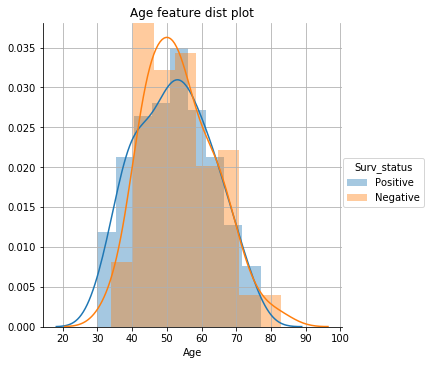

In [12]:
hist_plot("Age")

**Observations:-**

    1) Age of patients varies from 30 to approximately 82
    2) Survived patients has approximate mean of 52
    3) Non-Survived Patients has approximate mean of 53
    4) More number of Non-Survived patients are between ages 40 and 45
    5) More number of Survival patients are between ages 52 and 58


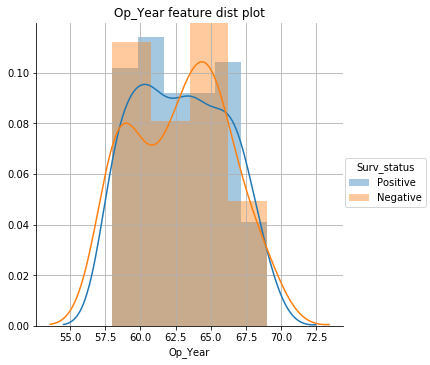

In [13]:
hist_plot("Op_Year")

**Observations:-**

    1) Operation year is approximately between 1958 to 1968
    2) More number of Survived Patients were operated between 1960 to 1961
    3) More number of Non-Survived Patients were operated between 1963 to 1966

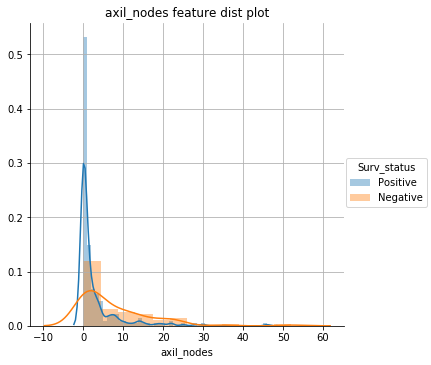

In [14]:
hist_plot("axil_nodes")

**Observations:-**

    1) More number of patients have zero axil nodes
    2) There are more Patients who survived with zero axil nodes
    3) Patients with zero axil nodes also had chances of non survival

# 1.2) Using PDF and CDF

In [15]:
def pdf_cdf_plot(column):
    
    '''
      This function is to plot the PDF and CDF for the input column
    '''
    
    counts, bin_edges = np.histogram(haberman[column], bins = 10, density = True)
    
    pdf = counts / sum(counts)
    cdf = np.cumsum(pdf)
    
    plt.plot(bin_edges[1:, ], pdf, 'b', label = 'PDF')
    plt.plot(bin_edges[1:, ], cdf, 'g', label = 'CDF')
    plt.grid()
    plt.legend()
    plt.title(column + " feature PDF and CDF plot")
    plt.show()

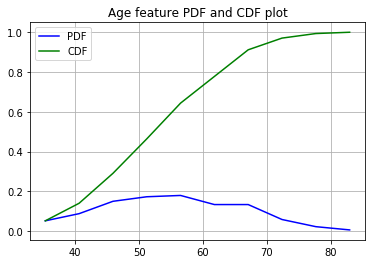

In [16]:
pdf_cdf_plot("Age")

**Observations:-**

    1) From CDF plot, 50 percent of the patients have age less than approximately 52
    2) From CDF plot, 80 percent of the patients have age less than approximately 63
    

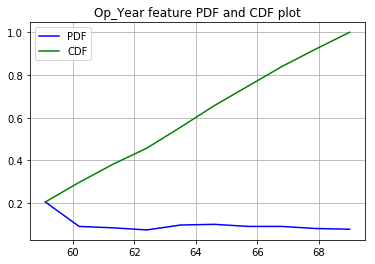

In [17]:
pdf_cdf_plot("Op_Year")

**Observation:-**

    1) From CDF plot, 50% of patients had their operation before 1963 approximately.
    2) From CDF plot, 90% of patients had their operation before 1967.

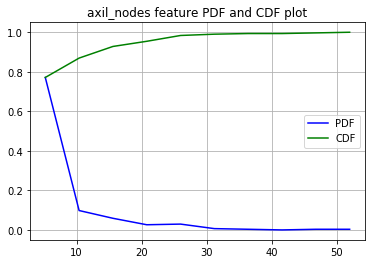

In [18]:
pdf_cdf_plot("axil_nodes")

**Observations:-**

    1) From CDF plot, 80% of patients has less than approximately 8 axil nodes

# 1.3) Box Plot

In [19]:
def box_plot(column):
    
    '''
     This function is to plot box plot for the input column
    '''
    
    sns.boxplot(data = haberman, x = "Surv_status", y = column)
    plt.grid()
    plt.title(column + " feature Box plot")
    plt.show()

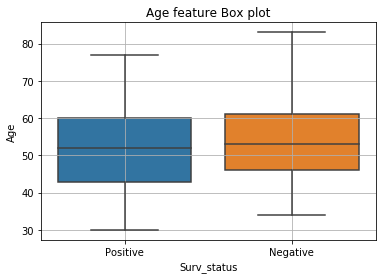

In [20]:
box_plot("Age")

**Observations:-**

    1) Mean of age of non-Survived patients is more than that of Survived patients
    2) 25th percentile value of age for Survived Patients is around 42
    3) 75th Percentile value of age for Survived Patients is around 60
    4) 25th percentile value of age for non-Survived Patients is around 45
    5) 75th percentile value of age for non-Survived Patients is around 60
    

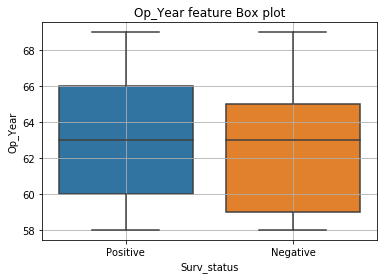

In [21]:
box_plot("Op_Year")

**Observations:-**

    1) 25th percentile value of operation year for Survived Patients is around 1960
    2) 75th Percentile value of operation year for Survived Patients is around 1966
    3) 25th percentile value of operation year for non-Survived Patients is around 1958
    4) 75th percentile value of operation year for non-Survived Patients is around 1965

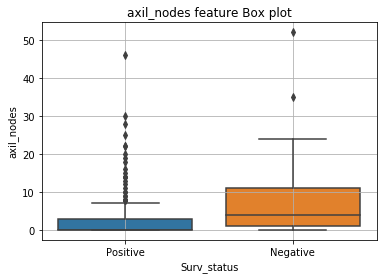

In [22]:
box_plot("axil_nodes")

**Observations:-**
 
    1) Patients who did not survive has more axil nodes than the patients who survived
    2) 25th percentile value of axil nodes for Survived Patients is 0
    3) 75th Percentile value of axil nodes for Survived Patients is around 2
    4) 25th percentile value of axil nodes for non-Survived Patients is around 3
    5) 75th percentile value of axil nodes for non-Survived Patients is around 11

# 1.4) Violin Plots

In [23]:
def violin_plot(column):
    
    '''
     This function is plot violin plot for the input column
    '''
    
    sns.violinplot(data = haberman, x = "Surv_status", y = column, size = 8)
    plt.grid()
    plt.title(column + " feature Violin plot")
    plt.show

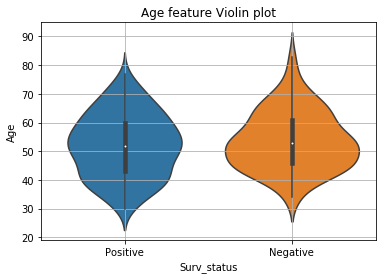

In [24]:
violin_plot("Age")

**Observation:-**

    1) Age of Patients who survived has the same distribution as of patients who did not survive
    2) Age alone is not a good feature to determine survival status

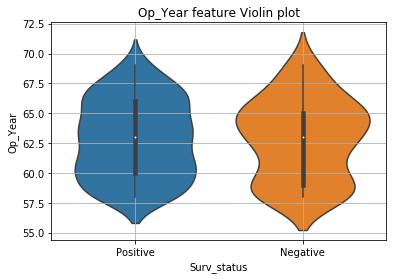

In [25]:
violin_plot("Op_Year")

**Observation:-**

    1) Operation Year of Patients who survived has the same distribution as of patients 
    who did not survive
    2) Operation Year alone is not a good feature to determine survival status

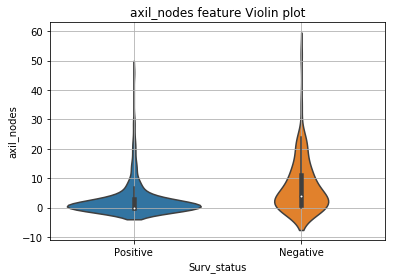

In [26]:
violin_plot("axil_nodes")

**Observations:-**

    1) Axil nodes of Patients who survived has different distribution as of patients 
    who did not survive
    2) Patients with less positive axil nodes have better chances of Survival 
    than that of more positive axil nodes
    3) Axil nodes feature alone can be used to determine the survival status

# 2) Bivariate analysis

# 2.1) Scatter Plot and Contour plot

In [30]:
def scatter_plot(column1, column2):
    
    '''
     This function is to plot scatter plot for the inputs columns
    '''
    
    sns.FacetGrid(haberman, hue = "Surv_status", size = 5) \
        .map(plt.scatter, column1, column2) \
        .add_legend()
    
    plt.grid()
    plt.title(column1 + " and " + column2 + " features Scatter plot")
    
    plt.show()
    
def contour_plot(column1, column2):
    
    '''
     This function is to plot contour plot for the given inputs
    '''
    sns.jointplot(data = haberman, x = column1, y = column2, kind = "kde")
    plt.grid()
    plt.suptitle(column1 + " and " + column2 + " features contour plot" \
                 , fontsize = 15)
    plt.show()    

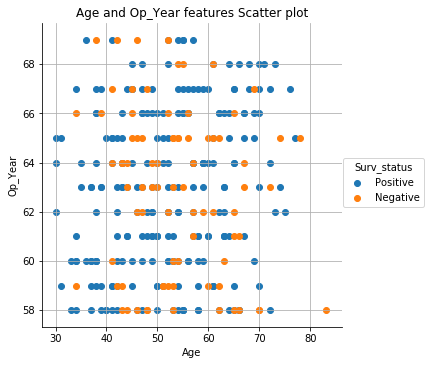

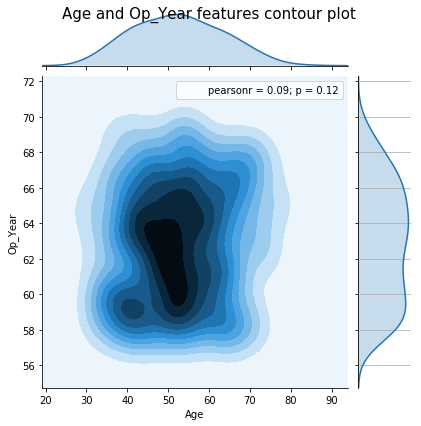

In [31]:
scatter_plot("Age", "Op_Year")

contour_plot("Age", "Op_Year")

**Observations:-**

    1) Data is completely scattered and overlapping for Age and Operation year features,
    hence we cannot conclude survival status from these features

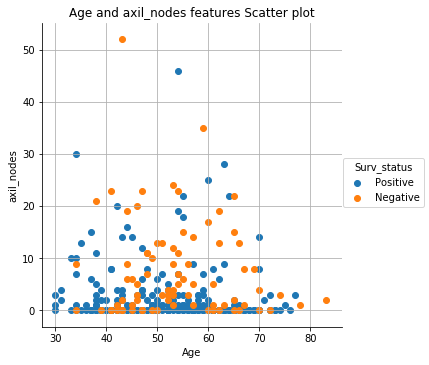

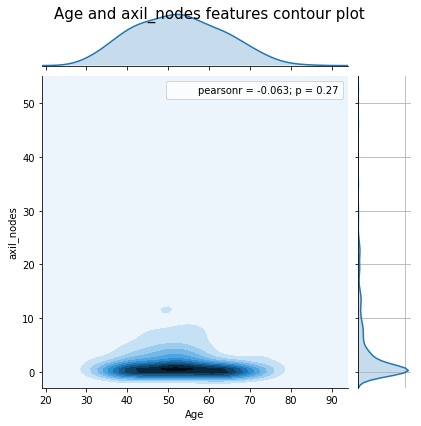

In [32]:
scatter_plot("Age", "axil_nodes")

contour_plot("Age", "axil_nodes")

**Observations:-**

    1) There are many zero axil nodes across all the ages.
    2) Data is completely scattered and overlapping for age and axil nodes features, 
    hence we cannot conclude survival status from these features

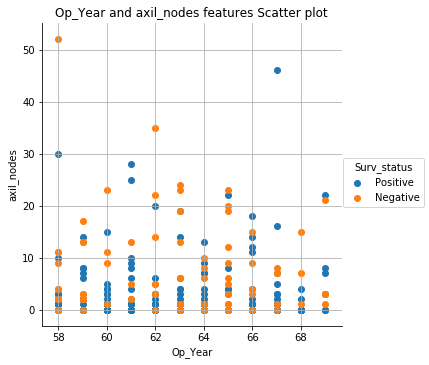

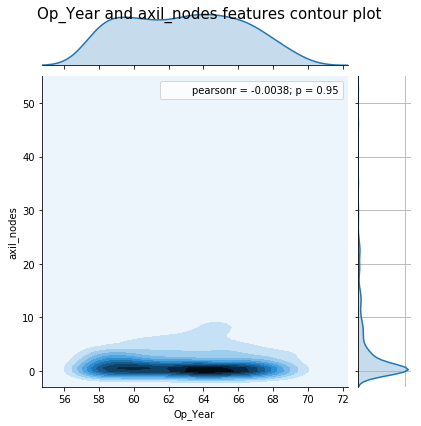

In [33]:
scatter_plot("Op_Year", "axil_nodes")

contour_plot("Op_Year", "axil_nodes")

**Observations:-**

    1) Data is completely scattered and overlapping for Operation year and axil nodes features,
    hence we cannot conclude survival status from these features

# 2.2) Pair Plot

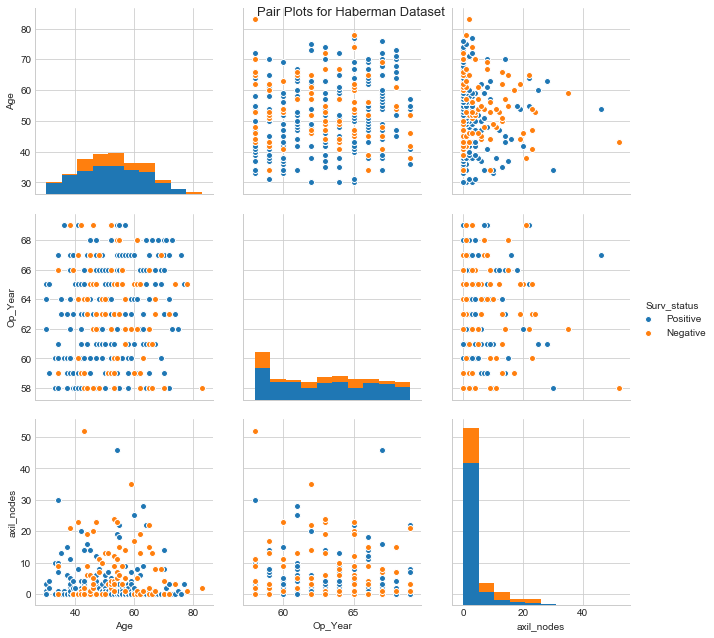

In [34]:
sns.set_style("whitegrid")
sns.pairplot(haberman, hue = "Surv_status", size = 3)
plt.suptitle("Pair Plots for Haberman Dataset", fontsize = 13)
plt.show()

**Observations:-**

    1) From the pair plots we can see that data is scattered and overlapping for each combination 
    of features and hence we cannot conclude the features that can be used for predicting 
    survivial status.

# 3) Feature Statistics

In [35]:
haberman_survived = haberman[haberman['Surv_status'] == 'Positive']
haberman_not_survived = haberman[haberman['Surv_status'] == 'Negative']

In [36]:
def haberman_statistics(column):
    
    '''
     This function prints Mean, Standard Deviation,Median, 
     Quantiles, MAD for the survival and not survived data
    '''
    
    print("*"*70)
    print("Mean of Survived patients for column " + column + \
          " is " + str(np.mean(haberman_survived[column]))
         )
    print("Mean of Non-Survived patients for column " + column + \
          " is " + str(np.mean(haberman_not_survived[column]))
         )
    print("*"*70)
    print("Standard Deviation of Survived patients for column " + column + \
          " is " + str(np.std(haberman_survived[column]))
         )
    print("Standard Deviation of Non-Survived patients for column " + column + \
          " is " + str(np.std(haberman_not_survived[column]))
         )
    print("*"*70)
    print("Median of Survived patients for column " + column + \
          " is " + str(np.median(haberman_survived[column]))
         )
    print("Median of Non-Survived patients for column " + column + \
          " is " + str(np.median(haberman_not_survived[column]))
         )
    print("*"*70)
    print("Quantiles of Survived patients for column " + column + \
    " is " + str(np.percentile(haberman_survived[column], np.arange(25, 125, 25)))
         )
    print("Quantiles of Non-Survived patients for column " + column + \
    " is " + str(np.percentile(haberman_not_survived[column], np.arange(25, 125, 25)))
         )
    print("*"*70)
    print("Median absolute deviation of Survived patients for column " + column + \
          " is " + str(robust.mad(haberman_survived[column]))
         )
    print("Median absolute deviation of Non-Survived patients for column " + column+\
          " is " + str(robust.mad(haberman_not_survived[column]))
         )
    print("*"*70)

In [37]:
haberman_statistics("Age")

**********************************************************************
Mean of Survived patients for column Age is 52.01777777777778
Mean of Non-Survived patients for column Age is 53.67901234567901
**********************************************************************
Standard Deviation of Survived patients for column Age is 10.98765547510051
Standard Deviation of Non-Survived patients for column Age is 10.10418219303131
**********************************************************************
Median of Survived patients for column Age is 52.0
Median of Non-Survived patients for column Age is 53.0
**********************************************************************
Quantiles of Survived patients for column Age is [43. 52. 60. 77.]
Quantiles of Non-Survived patients for column Age is [46. 53. 61. 83.]
**********************************************************************
Median absolute deviation of Survived patients for column Age is 13.343419966550417
Median absolute deviation of Non-

In [38]:
haberman_statistics("Op_Year")

**********************************************************************
Mean of Survived patients for column Op_Year is 62.86222222222222
Mean of Non-Survived patients for column Op_Year is 62.82716049382716
**********************************************************************
Standard Deviation of Survived patients for column Op_Year is 3.2157452144021956
Standard Deviation of Non-Survived patients for column Op_Year is 3.3214236255207883
**********************************************************************
Median of Survived patients for column Op_Year is 63.0
Median of Non-Survived patients for column Op_Year is 63.0
**********************************************************************
Quantiles of Survived patients for column Op_Year is [60. 63. 66. 69.]
Quantiles of Non-Survived patients for column Op_Year is [59. 63. 65. 69.]
**********************************************************************
Median absolute deviation of Survived patients for column Op_Year is 4.447806655516

In [39]:
haberman_statistics("axil_nodes")

**********************************************************************
Mean of Survived patients for column axil_nodes is 2.7911111111111113
Mean of Non-Survived patients for column axil_nodes is 7.45679012345679
**********************************************************************
Standard Deviation of Survived patients for column axil_nodes is 5.857258449412131
Standard Deviation of Non-Survived patients for column axil_nodes is 9.128776076761632
**********************************************************************
Median of Survived patients for column axil_nodes is 0.0
Median of Non-Survived patients for column axil_nodes is 4.0
**********************************************************************
Quantiles of Survived patients for column axil_nodes is [ 0.  0.  3. 46.]
Quantiles of Non-Survived patients for column axil_nodes is [ 1.  4. 11. 52.]
**********************************************************************
Median absolute deviation of Survived patients for column axil_

# Conclusions:-

    1) There is a lot of overlap for each combination of features and hence we cannot conclude 
    which combination of features can be used for predicting survivial status.
    2) Age alone is not useful in predicting the Survival status
    3) Operation Year alone is not useful in predicting the Survival status
    4) Axil nodes alone can be used to predict Survival Status due to below reasons 
    but still there will be high chances of misclassification as axil nodes overlap 
    for both classes
        1) Patients with less positive axil nodes has survived more than 5 years
        2) Patients with more positive axil nodes has died in less than 5 years
    5) Based on the given dataset it is very difficult to classify survival status of Patients